1. Batch Gradient descent with early stopping for softmax regresion

In [188]:
from sklearn.datasets import load_iris
data = load_iris()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [189]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [190]:
X = data['data'][:,(2,3)]
y = data['target']

add the bias term for every instances $x_0 = 1$

In [191]:
import numpy as np
X_with_bias = np.c_[np.ones([len(X)]),X]

Add the random seed, membuat sebuah outbut dapat di produksi

In [192]:
np.random.seed(2042)

In [214]:
# split the train and the validation data
test_ratio = 0.2
validation_ratio =0.2
total_size = len(X_with_bias)

#size the parameter
test_size = int(total_size * test_ratio)
validation_size = int(total_size * validation_ratio)
train_size = total_size - test_size - validation_size
print(test_size)
#randomized state
rnd_indices = np.random.permutation(total_size)

# calculate the value
X_train = X_with_bias[rnd_indices[:train_size]]
y_train = y[rnd_indices[:train_size]]

X_test = X_with_bias[rnd_indices[-test_size:]]
y_test = y[rnd_indices[-test_size:]]

X_valid = X_with_bias[rnd_indices[train_size:-test_size]]
y_valid = y[rnd_indices[train_size:-test_size]]

30


Pada target field sekarang memiliki sbeuah indeks (0,1,2) tapi kita membutuhkan sebuah target class probabilites untuk train the softmax regresion, yg mana probabilitas disini terdiri dari sebuah 0 dan 1.Convert vector of class indices ke dalam sebuah one hot decoder

In [194]:
def to_one_hot(y):
    n_classes = y.max() + 1 # 3
    m = len(y) #150
    Y_one_hot = np.zeros((m,n_classes))#150 instances row, 3 coloumn
    Y_one_hot[np.arange(m),y] =1 # data yang masuk di dalam index y (0,1,2) akan 1
    return Y_one_hot

In [195]:
# example 
y_train[:10]

array([0, 1, 2, 1, 1, 0, 1, 1, 1, 0])

In [196]:
to_one_hot(y_train[:10])

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

Target sudah menjadi class probabilitis matriks for the training set and the test set


In [197]:
Y_train_one_hot = to_one_hot(y_train)
Y_valid_one_hot = to_one_hot(y_valid)
Y_test_one_hot = to_one_hot(y_test)

Implement the sofrmax function ill get the multiclass clasification

$\sigma\left(\mathbf{s}(\mathbf{x})\right)_k = \dfrac{\exp\left(s_k(\mathbf{x})\right)}{\sum\limits_{j=1}^{K}{\exp\left(s_j(\mathbf{x})\right)}}$

In [198]:
# create the softmax function model
def softmax(logits):
    exps = np.exp(logits)
    exp_sums = np.sum(exps, axis = 1, keepdims=True)
    return exps /exp_sums

In [199]:
# create data 3D
n_inputs = X_train.shape[1] # == 3 (2 features plus the bias term)
n_outputs = len(np.unique(y_train))  # == 3 (3 iris classes virginicia)

Persamaan untuk cost funciton:

$J(\mathbf{\Theta}) =-\dfrac{1}{m}\sum\limits_{i=1}^{m}\sum\limits_{k=1}^{K}{y_k^{(i)}\log\left(\hat{p}_k^{(i)}\right)}$

Persamaan untuk gradients:

$\nabla_{\mathbf{\theta}^{(k)}} \, J(\mathbf{\Theta}) = \dfrac{1}{m} \sum\limits_{i=1}^{m}{ \left ( \hat{p}^{(i)}_k - y_k^{(i)} \right ) \mathbf{x}^{(i)}}$

Note that $\log\left(\hat{p}_k^{(i)}\right)$ may not be computable if $\hat{p}_k^{(i)} = 0$. So we will add a tiny value $\epsilon$ to $\log\left(\hat{p}_k^{(i)}\right)$ to avoid getting `nan` values.


In [200]:
eta = 0.01 # learning rate
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7

Theta = np.random.randn(n_inputs,n_outputs)# 3 - 3 -> random state.

for iteration in range(n_iterations):
    logits = X_train.dot(Theta) # di kalikan dengan random sate
    #hasilnya akan disesuaikan berdasarkan 3 kolom dari label
    Y_proba = softmax(logits) # setiap instance yang masuk di dapatkan y_probanya
    if iteration % 500 ==0:
        # cost funcitonnya
        loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon),axis=1))
        print(iteration, loss)
    error = Y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error)
    # next theta Theta - MSE * learning rate
    Theta = Theta - eta * gradients


0 5.446205811872683
500 0.8350062641405651
1000 0.6878801447192402
1500 0.6012379137693313
2000 0.5444496861981872
2500 0.5038530181431525
3000 0.4729228972192248
3500 0.44824244188957774
4000 0.4278651093928793
4500 0.4106007142918712
5000 0.3956780375390374


The softmax model is trained , ini adalah sebuah parameter dari modelnya

In [201]:
Theta

array([[ 3.32094157, -0.6501102 , -2.99979416],
       [-1.1718465 ,  0.11706172,  0.10507543],
       [-0.70224261, -0.09527802,  1.4786383 ]])

In [202]:
#lets make the predictions 
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba,axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

0.9666666666666667

In [203]:
y_valid

array([0, 2, 0, 0, 1, 2, 2, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 0, 1,
       2, 2, 1, 0, 0, 1, 1, 2])

Create the early stoping to make the regulazied the model, measure the loss on the validation at every siration and stop the error strarts growing

In [204]:
eta = 0.1
n_iterations =5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1 # regulazied hyperparameter
best_loss = np.infty

Theta = np.random.randn(n_inputs,n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    error = Y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]),alpha * Theta[1:]]
    Theta = Theta - eta * gradients
    
    logits = X_valid.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_valid_one_hot * np.log(Y_proba + epsilon),axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss  = xentropy_loss + alpha *l2_loss
    if iteration % 500 == 0:
        print(iteration, loss)
    if loss < best_loss:
        best_loss = loss
    else:
        print(iteration - 1, best_loss)
        print(iteration, loss, "early stopping!")
        break

        

0 4.737727518674819
500 0.5665936705360494
1000 0.5416998332012444
1500 0.5350529375648613
2000 0.5330543544990186
2500 0.5325716489587928
2701 0.5325452746042684
2702 0.5325452748471854 early stopping!


In [205]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba,axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

1.0

Model incresy dengan menggunakan sebuah early stop jadi membuat loss coss function tidak take naik lagi dan menstop pada global minum dan tidak di stochastic mencari sebuah global minimum lagi

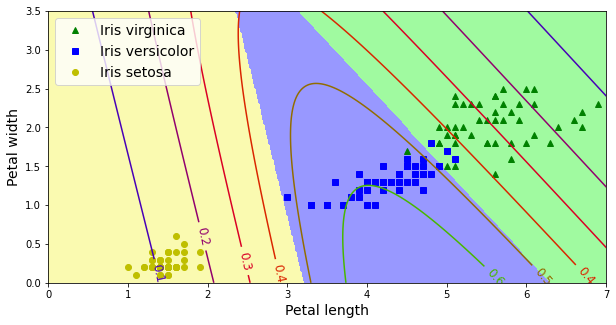

In [211]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
X_new_with_bias = np.c_[np.ones([len(X_new), 1]), X_new]

logits = X_new_with_bias.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

zz1 = Y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 5))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")


custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

In [216]:
# skrng gunakan sebuah testing data
# validasi tadi menggunakan sebuah training data yg diambil hanya 30 data
# testing data jelas adalah sebuah data 20 % selain train dta
logits = X_test.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba,axis=1)

accuracy_score = np.mean(y_predict == y_test)
accuracy_score


0.9666666666666667